In [ ]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [2]:
# read it in to inspect it
with open('./data/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [4]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))

In [6]:
chars

['\n',
 ' ',
 '!',
 '$',
 '&',
 "'",
 ',',
 '-',
 '.',
 '3',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
vocab_size = len(chars)

In [8]:
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [9]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }

In [10]:
stoi

{'\n': 0,
 ' ': 1,
 '!': 2,
 '$': 3,
 '&': 4,
 "'": 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '3': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'D': 16,
 'E': 17,
 'F': 18,
 'G': 19,
 'H': 20,
 'I': 21,
 'J': 22,
 'K': 23,
 'L': 24,
 'M': 25,
 'N': 26,
 'O': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64}

In [11]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }

In [12]:
stoi

{'\n': 0,
 ' ': 1,
 '!': 2,
 '$': 3,
 '&': 4,
 "'": 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '3': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'A': 13,
 'B': 14,
 'C': 15,
 'D': 16,
 'E': 17,
 'F': 18,
 'G': 19,
 'H': 20,
 'I': 21,
 'J': 22,
 'K': 23,
 'L': 24,
 'M': 25,
 'N': 26,
 'O': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38,
 'a': 39,
 'b': 40,
 'c': 41,
 'd': 42,
 'e': 43,
 'f': 44,
 'g': 45,
 'h': 46,
 'i': 47,
 'j': 48,
 'k': 49,
 'l': 50,
 'm': 51,
 'n': 52,
 'o': 53,
 'p': 54,
 'q': 55,
 'r': 56,
 's': 57,
 't': 58,
 'u': 59,
 'v': 60,
 'w': 61,
 'x': 62,
 'y': 63,
 'z': 64}

In [13]:
itos = { i:ch for i,ch in enumerate(chars) }

In [14]:
itos

{0: '\n',
 1: ' ',
 2: '!',
 3: '$',
 4: '&',
 5: "'",
 6: ',',
 7: '-',
 8: '.',
 9: '3',
 10: ':',
 11: ';',
 12: '?',
 13: 'A',
 14: 'B',
 15: 'C',
 16: 'D',
 17: 'E',
 18: 'F',
 19: 'G',
 20: 'H',
 21: 'I',
 22: 'J',
 23: 'K',
 24: 'L',
 25: 'M',
 26: 'N',
 27: 'O',
 28: 'P',
 29: 'Q',
 30: 'R',
 31: 'S',
 32: 'T',
 33: 'U',
 34: 'V',
 35: 'W',
 36: 'X',
 37: 'Y',
 38: 'Z',
 39: 'a',
 40: 'b',
 41: 'c',
 42: 'd',
 43: 'e',
 44: 'f',
 45: 'g',
 46: 'h',
 47: 'i',
 48: 'j',
 49: 'k',
 50: 'l',
 51: 'm',
 52: 'n',
 53: 'o',
 54: 'p',
 55: 'q',
 56: 'r',
 57: 's',
 58: 't',
 59: 'u',
 60: 'v',
 61: 'w',
 62: 'x',
 63: 'y',
 64: 'z'}

In [15]:
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers

In [16]:
print(encode("hi there!"))

[46, 47, 1, 58, 46, 43, 56, 43, 2]


In [17]:
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [18]:
print(decode([46, 47, 1, 58, 46, 43, 56, 43, 2]))

hi there!


In [19]:
print(decode(encode("hi there!")))

hi there!


In [20]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org

In [21]:
torch.__version__

'2.4.1+cpu'

In [22]:
import torch
data = torch.tensor(encode(text), dtype=torch.long)

In [23]:
dir(torch)

['AVG',
 'AggregationType',
 'AliasDb',
 'Any',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'AwaitType',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CallStack',
 'Callable',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ComplexType',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'DeepCopyMemoTable',
 'DeserializationStorageContext',
 'DeviceObjType',
 'Dict',
 'DictType',
 'DisableTorchFunction',
 'DisableTorchFunctionSubclass',
 'DispatchKey',
 'DispatchKeySet',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'Event',
 'ExcludeDispatchKeyGuard',
 'ExecutionPlan',
 'FatalError',
 'FileCheck',
 'FloatStorage',
 'FloatTensor',
 'FloatType',
 'FunctionSchema',
 'Future',
 'FutureType',
 'Generator',
 'GradSca

In [24]:
data[:1000]   # the  characters we looked at earier will to the GPT look like this

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [25]:
print(data.shape, data.dtype)

torch.Size([1115394]) torch.int64


In [26]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [27]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [28]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [29]:
for t in range(block_size):
    context = x[:t]
    target = x[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([], dtype=torch.int64) the target: 18
when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47


In [30]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

In [31]:
(batch_size,)

(4,)

In [32]:
torch.randint(10, (2,))

tensor([5, 7])

In [33]:
ix = torch.randint(len(train_data) - block_size, (batch_size,))

In [34]:
ix

tensor([934904, 560986, 971401, 579495])

In [35]:
[data[i:i+block_size] for i in ix]

[tensor([52, 58,  1, 58, 46, 39, 58,  1]),
 tensor([25, 17, 27, 10,  0, 21,  1, 54]),
 tensor([57, 43, 60, 43, 52,  1, 63, 43]),
 tensor([60, 43, 42,  8,  0, 25, 63,  1])]

In [36]:
x = torch.stack([data[i:i+block_size] for i in ix])

In [37]:
x

tensor([[52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54],
        [57, 43, 60, 43, 52,  1, 63, 43],
        [60, 43, 42,  8,  0, 25, 63,  1]])

In [38]:
[data[i+1:i+block_size+1] for i in ix]

[tensor([58,  1, 58, 46, 39, 58,  1, 46]),
 tensor([17, 27, 10,  0, 21,  1, 54, 39]),
 tensor([43, 60, 43, 52,  1, 63, 43, 39]),
 tensor([43, 42,  8,  0, 25, 63,  1, 45])]

In [39]:
y = torch.stack([data[i+1:i+block_size+1] for i in ix])

In [40]:
y

tensor([[58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39],
        [43, 60, 43, 52,  1, 63, 43, 39],
        [43, 42,  8,  0, 25, 63,  1, 45]])

In [41]:

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

In [42]:
xb, yb = get_batch('train')

In [43]:
xb

tensor([[56, 42,  5, 57,  1, 57, 39, 49],
        [43, 57, 58, 63,  6,  1, 58, 46],
        [43,  1, 51, 39, 63,  1, 40, 43],
        [58, 46, 43,  1, 43, 39, 56, 57]])

In [44]:
yb

tensor([[42,  5, 57,  1, 57, 39, 49, 43],
        [57, 58, 63,  6,  1, 58, 46, 47],
        [ 1, 51, 39, 63,  1, 40, 43,  1],
        [46, 43,  1, 43, 39, 56, 57, 10]])

In [45]:
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

inputs:
torch.Size([4, 8])
tensor([[56, 42,  5, 57,  1, 57, 39, 49],
        [43, 57, 58, 63,  6,  1, 58, 46],
        [43,  1, 51, 39, 63,  1, 40, 43],
        [58, 46, 43,  1, 43, 39, 56, 57]])
targets:
torch.Size([4, 8])
tensor([[42,  5, 57,  1, 57, 39, 49, 43],
        [57, 58, 63,  6,  1, 58, 46, 47],
        [ 1, 51, 39, 63,  1, 40, 43,  1],
        [46, 43,  1, 43, 39, 56, 57, 10]])
----


In [46]:
for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

when input is [56] the target: 42
when input is [56, 42] the target: 5
when input is [56, 42, 5] the target: 57
when input is [56, 42, 5, 57] the target: 1
when input is [56, 42, 5, 57, 1] the target: 57
when input is [56, 42, 5, 57, 1, 57] the target: 39
when input is [56, 42, 5, 57, 1, 57, 39] the target: 49
when input is [56, 42, 5, 57, 1, 57, 39, 49] the target: 43
when input is [43] the target: 57
when input is [43, 57] the target: 58
when input is [43, 57, 58] the target: 63
when input is [43, 57, 58, 63] the target: 6
when input is [43, 57, 58, 63, 6] the target: 1
when input is [43, 57, 58, 63, 6, 1] the target: 58
when input is [43, 57, 58, 63, 6, 1, 58] the target: 46
when input is [43, 57, 58, 63, 6, 1, 58, 46] the target: 47
when input is [43] the target: 1
when input is [43, 1] the target: 51
when input is [43, 1, 51] the target: 39
when input is [43, 1, 51, 39] the target: 63
when input is [43, 1, 51, 39, 63] the target: 1
when input is [43, 1, 51, 39, 63, 1] the target: 

In [47]:
print(xb) # our input to the transformer

tensor([[56, 42,  5, 57,  1, 57, 39, 49],
        [43, 57, 58, 63,  6,  1, 58, 46],
        [43,  1, 51, 39, 63,  1, 40, 43],
        [58, 46, 43,  1, 43, 39, 56, 57]])


In [48]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

The BigramLanguageModel class is a PyTorch neural network module that implements a simple bigram language model. A bigram language model predicts the next token in a sequence based on the current token.

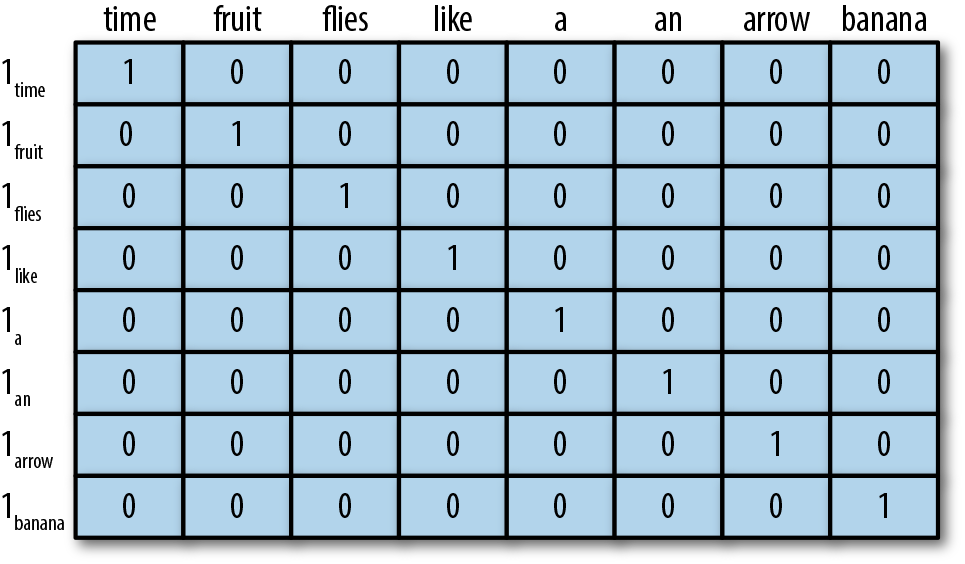

In [67]:
xb.shape

torch.Size([4, 8])

In [68]:
yb.shape

torch.Size([4, 8])

In [ ]:
# The model consists of a single embedding table (token_embedding_table) that maps each token in the vocabulary to a vector of size vocab_size. This embedding table serves as a lookup table for the next token's logits.
# __init__ Method
# The __init__ method initializes the model by creating the token_embedding_table with the specified vocab_size.
# forward Method
# The forward method defines the forward pass through the network. It takes two inputs:
# idx: A tensor of shape (B, T) containing the indices of the input tokens.
# targets: An optional tensor of shape (B, T) containing the indices of the target tokens.
# The method returns two outputs:
# logits: A tensor of shape (B, T, C) containing the logits for the next token.
# loss: The cross-entropy loss between the predicted logits and the target tokens (if targets is provided).
# generate Method
# he generate method generates new tokens based on the input context. It takes two inputs:
# idx: A tensor of shape (B, T) containing the indices of the input context.
# max_new_tokens: The maximum number of new tokens to generate.
# The method returns the generated sequence of tokens, which includes the original input context.

In [49]:
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None): # idx = input tokens and targets = target tokens

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx


In [ ]:
# This code defines a token embedding table using PyTorch's nn.Embedding module.
# What is an Embedding Table?
# An embedding table is a learnable matrix that maps discrete tokens (e.g., words, characters) to dense vectors. These vectors, called embeddings, capture the semantic meaning of the tokens.
# Parameters:
# vocab_size: The number of unique tokens in the vocabulary.
# vocab_size: The dimensionality of the embedding vectors.
# How it Works:
# The nn.Embedding module creates a matrix of shape (vocab_size, vocab_size).
# Each row in the matrix represents a token in the vocabulary.
# Each column in the matrix represents a dimension in the embedding space.
# During training, the model learns to update the embedding table to capture meaningful relationships between tokens.
# Why Use an Embedding Table?
# Using an embedding table provides several benefits:
# Efficient representation: Embedding tables can represent large vocabularies using a relatively small number of parameters.
# Captures semantic meaning: Embeddings can capture nuanced relationships between tokens, such as synonyms, antonyms, and analogies.
# Improves model performance: Using pre-trained embeddings or learning embeddings during training can significantly improve the performance of NLP models.
# In the context of the BigramLanguageModel class, the token embedding table is used to map input tokens to their corresponding embedding vectors, which are then used to predict the next token in the sequence.

In [ ]:

# Here's a succinct yet thorough explanation of the code:
# Code Breakdown:
# Python
# logits = logits.view(B*T, C)
# targets = targets.view(B*T)
# Explanation:
# This code reshapes the logits and targets tensors using the view() method.
# logits:
# logits.view(B*T, C): Reshapes the logits tensor from its original shape (B, T, C) to a new shape (B*T, C).
# B: Batch size (number of input sequences)
# T: Sequence length (number of time steps)
# C: Number of classes or output units
# targets:
# targets.view(B*T): Reshapes the targets tensor from its original shape (B, T) to a new shape (B*T,).
# B: Batch size (number of input sequences)
# T: Sequence length (number of time steps)
# Why Reshape?
# Reshaping the tensors is necessary for the following reasons:
# Flattening the sequence dimension: By reshaping (B, T, C) to (B*T, C), we flatten the sequence dimension (B, T) into a single dimension (B*T). This allows us to treat each time step as a separate sample.
# Matching the loss function's expectations: The cross_entropy loss function expects the input tensor to have shape (N, C), where N is the number of samples and C is the number of classes. By reshaping the tensors, we ensure that they match the expected shape.

In [ ]:
# Loop through the number of new tokens to generate: The method loops max_new_tokens times to generate new tokens one by one.
# Get the predictions: In each iteration, the method calls the model's forward method with the current input context idx to get the predictions (logits and loss).
# Focus on the last time step: The method selects only the last time step's logits by indexing logits[:, -1, :]. This gives a tensor of shape (B, C), where B is the batch size and C is the number of classes.
# Apply softmax to get probabilities: The method applies the softmax activation function to the logits using F.softmax(logits, dim=-1). This gives a tensor of shape (B, C) containing probabilities.
# Sample from the distribution: The method samples from the probability distribution using torch.multinomial(probs, num_samples=1). This gives a tensor of shape (B, 1) containing the indices of the sampled tokens.
# Append the sampled index to the running sequence: The method appends the sampled index to the running sequence idx using torch.cat((idx, idx_next), dim=1).
# Return the generated sequence: After generating all the new tokens, the method returns the final generated sequence idx.

In [50]:
vocab_size # length of the uniqe characters

65

In [51]:
m = BigramLanguageModel(vocab_size)

In [52]:
m

BigramLanguageModel(
  (token_embedding_table): Embedding(65, 65)
)

In [53]:
m.token_embedding_table

Embedding(65, 65)

In [54]:
xb

tensor([[56, 42,  5, 57,  1, 57, 39, 49],
        [43, 57, 58, 63,  6,  1, 58, 46],
        [43,  1, 51, 39, 63,  1, 40, 43],
        [58, 46, 43,  1, 43, 39, 56, 57]])

In [55]:
yb

tensor([[42,  5, 57,  1, 57, 39, 49, 43],
        [57, 58, 63,  6,  1, 58, 46, 47],
        [ 1, 51, 39, 63,  1, 40, 43,  1],
        [46, 43,  1, 43, 39, 56, 57, 10]])

Logits:  Unnormalized scores that can take on any real value. Logits represent the "raw" output of a model. before applying the activation function

Probabilities:  Normalized values between 0 and 1 that represent the likelihood of a particular outcome. Probabilities are often obtained by applying an activation function, such as softmax or sigmoid, to the logits. after applying activation function, like softmax , sigmoid etc

In [56]:
logits, loss = m(xb, yb)

In [ ]:
# This code calls the forward method of a PyTorch neural network model m, passing in two inputs:
# xb: A batch of input data (e.g., images, text, etc.)
# yb: A batch of corresponding target labels or outputs
# The forward method returns two values:
# logits: The model's predictions or output scores (before applying an activation function)
# loss: The calculated loss or error between the model's predictions and the target labels
# What the Code Does:
# When you call this code:
# The model m processes the input batch xb through its layers.
# The model generates output scores or logits.
# The model calculates the loss between its predictions and the target labels yb.
# The logits and loss values are returned and assigned to the variables logits and loss, respectively.
# The logits and loss values can then be used for various purposes, such as:
# Evaluating the model's performance
# Training the model using backpropagation
# Generating predictions or outputs for new input data

In [57]:
logits

tensor([[-0.6722,  0.2322, -0.1632,  ...,  0.1390,  0.7560,  0.4296],
        [ 1.0726,  0.7295, -0.6665,  ...,  0.3115, -1.7675,  0.6818],
        [-0.1338,  0.3899, -0.2884,  ..., -0.5512,  1.0477,  1.6187],
        ...,
        [ 1.1513,  1.0539,  3.4105,  ..., -0.5686,  0.9079, -0.1701],
        [-0.6722,  0.2322, -0.1632,  ...,  0.1390,  0.7560,  0.4296],
        [-0.5201,  0.2831,  1.0847,  ..., -0.0198,  0.7959,  1.6014]],
       grad_fn=<ViewBackward0>)

In [58]:
logits.shape

torch.Size([32, 65])

In [59]:
logits[0]

tensor([-0.6722,  0.2322, -0.1632,  0.5926,  1.7734,  1.2618,  0.6474, -0.3519,
         1.0237, -0.1184,  0.1446,  0.0477, -0.4317,  0.0058, -0.3478, -0.2188,
         1.2574, -0.7758,  0.9081, -1.1492, -1.6415,  1.3099,  1.2829, -0.9754,
         0.5888, -0.3234, -0.9876, -0.1603, -0.2273,  0.6294, -0.4703, -0.1420,
        -1.0257,  0.3648,  0.8021,  0.5142, -1.0679, -0.6295, -0.1167, -0.0337,
         0.2609, -0.2877,  1.7954,  0.6843, -0.8268,  1.8204,  0.3783,  0.5864,
        -0.2330, -0.3098,  0.7679, -0.0269,  0.6213, -1.3444, -1.3337,  0.2562,
        -1.1706, -0.5799, -1.1549,  0.4594,  0.1099, -0.4593,  0.1390,  0.7560,
         0.4296], grad_fn=<SelectBackward0>)

In [64]:
logits[1]

tensor([ 1.0726,  0.7295, -0.6665, -0.4071,  1.0580,  0.7095,  1.8728, -0.8542,
         0.4089, -0.6644, -0.7699, -0.5311,  1.3702, -0.6511, -1.3560, -1.5675,
        -0.5239,  0.6937, -0.1874, -0.4551, -0.0516, -0.4424,  0.1604, -1.1646,
         0.6482, -1.6310, -0.5834, -1.7104,  0.6697, -1.2521, -0.3970,  0.3250,
        -1.0091, -0.0558, -0.4422, -0.1064,  0.4973,  0.6844,  1.6967,  1.2412,
         1.2617,  1.3472,  1.3725, -0.3011,  0.6546,  0.1393,  0.9892, -1.0955,
        -0.7337, -0.5563,  1.1861,  1.0686, -0.8841, -1.4150, -0.2771, -0.3126,
        -0.9772, -0.5400, -0.2355,  0.8232, -0.5872, -0.7521,  0.3115, -1.7675,
         0.6818], grad_fn=<SelectBackward0>)

In [60]:
loss

tensor(4.5039, grad_fn=<NllLossBackward0>)

In [61]:
idx = torch.zeros((1, 1), dtype=torch.long)

In [62]:
idx

tensor([[0]])

In [63]:
m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)

tensor([[ 0, 31, 56, 12, 55, 28,  7, 29, 35, 49, 58, 36, 53, 24,  4, 48, 24, 16,
         22, 45, 27, 24, 34, 64,  5, 30, 21, 53, 16, 55, 20, 42, 46, 57, 34,  4,
         60, 24, 24, 62, 39, 58, 48, 57, 41, 25, 54, 61, 24, 17, 30, 31, 28, 63,
         39, 53,  8, 55, 44, 64, 57,  3, 37, 57,  3, 64, 18,  7, 61,  6, 11, 43,
         17, 49, 64, 62, 48, 45, 15, 23, 18, 15, 46, 57,  2, 47, 35, 35,  8, 27,
         40, 64, 16, 52, 62, 13,  1, 25, 57,  3,  9]])

In [ ]:
# Explanation:
# This code calls the generate method of an object m, which is likely an instance of a language model class.
# idx Argument:
# torch.zeros((1, 1), dtype=torch.long): Creates a tensor filled with zeros, with shape (1, 1) and data type torch.long (which represents long integers).
# This tensor represents the initial input to the language model, which is a single token with index 0.
# max_new_tokens Argument:
# max_new_tokens=100: Specifies the maximum number of new tokens to generate.
# The language model will generate new tokens one by one, conditioning on the previous tokens, until it reaches the maximum number of tokens specified.
# What the Code Does:
# When you call this code, the language model will:
# Start with the initial input token (index 0).
# Generate a new token based on the initial input token.
# Append the new token to the input sequence.
# Repeat steps 2-3 until it reaches the maximum number of tokens specified (100 in this case).
# Return the generated sequence of tokens.

In [65]:
decode([ 0, 31, 56, 12, 55, 28,  7, 29, 35, 49, 58, 36, 53, 24,  4, 48, 24, 16,
         22, 45, 27, 24, 34, 64,  5, 30, 21, 53, 16, 55, 20, 42, 46, 57, 34,  4,
         60, 24, 24, 62, 39, 58, 48, 57, 41, 25, 54, 61, 24, 17, 30, 31, 28, 63,
         39, 53,  8, 55, 44, 64, 57,  3, 37, 57,  3, 64, 18,  7, 61,  6, 11, 43,
         17, 49, 64, 62, 48, 45, 15, 23, 18, 15, 46, 57,  2, 47, 35, 35,  8, 27,
         40, 64, 16, 52, 62, 13,  1, 25, 57,  3,  9])

"\nSr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3"

In [66]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


pdcbf?pGXepydZJSrF$Jrqt!:wwWSzPNxbjPiD&Q!a;yNt$Kr$o-gC$WSjJqfBKBySKtSKpwNNfyl&w:q-jluBatD$Lj;?yzyUca


In [69]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [70]:
optimizer

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

In [71]:
# sample a batch of data
xb, yb = get_batch('train')

In [72]:
xb

tensor([[42,  1, 51, 63,  1, 15, 56, 43],
        [47, 57,  1, 46, 59, 51, 40, 50],
        [39, 60, 43,  1, 58, 53,  1, 50],
        [43, 52,  6,  1, 53, 59, 56,  1]])

In [73]:
yb

tensor([[ 1, 51, 63,  1, 15, 56, 43, 39],
        [57,  1, 46, 59, 51, 40, 50, 43],
        [60, 43,  1, 58, 53,  1, 50, 53],
        [52,  6,  1, 53, 59, 56,  1, 57]])

In [74]:
# evaluate the loss
logits, loss = m(xb, yb)

In [75]:
logits

tensor([[ 1.0726,  0.7295, -0.6665,  ...,  0.3115, -1.7675,  0.6818],
        [ 0.5978, -0.0514, -0.0646,  ..., -1.4649, -2.0555,  1.8275],
        [-1.4177,  0.8682, -0.9121,  ..., -0.6264,  1.2195,  0.2068],
        ...,
        [-0.4002,  0.3302,  1.5454,  ...,  1.3688,  0.4620,  0.2040],
        [-0.6722,  0.2322, -0.1632,  ...,  0.1390,  0.7560,  0.4296],
        [ 0.5978, -0.0514, -0.0646,  ..., -1.4649, -2.0555,  1.8275]],
       grad_fn=<ViewBackward0>)

In [76]:
loss

tensor(4.7769, grad_fn=<NllLossBackward0>)

In [77]:
optimizer.zero_grad(set_to_none=True)

In [78]:
loss.backward()

In [80]:
batch_size = 32
for steps in range(100): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

4.51960563659668


In [81]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


SPCAuCX:bOlgiRQWN:Mphaw
tRLKuYXEaAXxrcq-gCUzeh3w!AcyaylgYWjmJM?Uzw:inaY,:C&OECW:vmGGJAn3onAuMgia!ms$Vb q-gCOcPcUhOnxJGUGSPJWT:.?ujmJFoiNL&A'DxY,prZ?qdT;hoo'dHooXXlxf'WkHK&u3Q?rqUi.kz;?Yx?C&u3Qbfzxlyh'Vl:zyxjKXgC?
lv'QKFiBeviNxO'm!Upm$srm&TqViqiBD3HBP!juEOpmZJyF$Fwfy!PlvWPFC
&WDdP!Ko,px
x
tREOE;AJ.BeXkylOVD3KHp$e?nD,.SFbWWI'ubcL!q-tU;aXmJ&uGXHxJXI&Z!gHRpajj;l.
pTErIBjx;JKIgoCnLGXrJSP!AU-AcbczR?aytqQmBxZb:txqfSBj$I&
gXxy,j,SYgOmgXAaVzLXxlVSP!uSq 3!UM&vcL&yN!zXiA.da-mZ3Izkm!a;Ilkzdd -gwCjN.ivvhM;TB


The mathematical trick in self-attention

In [82]:
torch.manual_seed(42)

In [83]:
a = torch.tril(torch.ones(3, 3))

In [84]:
a

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [85]:
torch.sum(a, 1, keepdim=True) # over axis 1 or column

tensor([[1.],
        [2.],
        [3.]])

In [86]:
a = a / torch.sum(a, 1, keepdim=True)

In [87]:
a

tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])

In [90]:
b = torch.randint(0,10,(3,2)) # lower bound, upper bound, shape(row, column)

In [91]:
b

tensor([[0, 4],
        [1, 2],
        [5, 5]])

In [94]:
b=b.float() # lower bound, upper bound, shape(row, column

In [97]:
a # 3x3

tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])

In [103]:
b # 3x2

tensor([[0., 4.],
        [1., 2.],
        [5., 5.]])

In [ ]:
a@b #   (3x3) * (3x2) = (3x2)

tensor([[0.0000, 4.0000],
        [0.5000, 3.0000],
        [2.0000, 3.6667]])

In [98]:
import numpy as np

In [99]:
np.dot(a, b)   # (3x3) * (3x2) = (3x2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19732\1273687973.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.dot(a, b)


array([[0.       , 4.       ],
       [0.5      , 3.       ],
       [2.       , 3.6666667]], dtype=float32)

In [100]:
np.multiply(a, b)

ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

In [104]:
np.multiply(a, [4,5,6]) # numpy broadcasting ( row(a) * row(b))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19732\483483825.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.multiply(a, [4,5,6])


tensor([[4.0000, 0.0000, 0.0000],
        [2.0000, 2.5000, 0.0000],
        [1.3333, 1.6667, 2.0000]], dtype=torch.float64)

In [105]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42) #This ensures that the results of any random operations (like torch.randint) will be reproducible.
a = torch.tril(torch.ones(3, 3)) #lower triangular part of the matrix, setting all elements above the diagonal to zero.
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b  #This line performs matrix multiplication between a and b, storing the result in c. The @ operator is used for matrix multiplication in PyTorch.
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=') #The resulting matrix c will be a 3x2 matrix, where each element is a weighted sum of the corresponding elements in b, with the weights determined by the normalized rows of a.
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [106]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time step, channels or class
x = torch.randn(B,T,C)  
x.shape

torch.Size([4, 8, 2])

In [ ]:
# This line creates a random tensor x with shape (B, T, C), which is (4, 8, 2) in this case.
# The torch.randn function generates a tensor with random values from a normal distribution (mean 0, standard deviation 1).
# Result:
# The resulting tensor x has:
# 4 batches (or samples)
# 8 time steps (or sequence length)
# 2 channels (or classes)
# This tensor can be used as input to various deep learning models, such as recurrent neural networks (RNNs), long short-term memory (LSTM) networks, or transformers.

In [108]:
x[0] # first batch

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [109]:
x[0][0] # time step or row

tensor([ 0.1808, -0.0700])

In [110]:
x[0][0][0]

tensor(0.1808)

In [107]:
x

tensor([[[ 0.1808, -0.0700],
         [-0.3596, -0.9152],
         [ 0.6258,  0.0255],
         [ 0.9545,  0.0643],
         [ 0.3612,  1.1679],
         [-1.3499, -0.5102],
         [ 0.2360, -0.2398],
         [-0.9211,  1.5433]],

        [[ 1.3488, -0.1396],
         [ 0.2858,  0.9651],
         [-2.0371,  0.4931],
         [ 1.4870,  0.5910],
         [ 0.1260, -1.5627],
         [-1.1601, -0.3348],
         [ 0.4478, -0.8016],
         [ 1.5236,  2.5086]],

        [[-0.6631, -0.2513],
         [ 1.0101,  0.1215],
         [ 0.1584,  1.1340],
         [-1.1539, -0.2984],
         [-0.5075, -0.9239],
         [ 0.5467, -1.4948],
         [-1.2057,  0.5718],
         [-0.5974, -0.6937]],

        [[ 1.6455, -0.8030],
         [ 1.3514, -0.2759],
         [-1.5108,  2.1048],
         [ 2.7630, -1.7465],
         [ 1.4516, -1.5103],
         [ 0.8212, -0.2115],
         [ 0.7789,  1.5333],
         [ 1.6097, -0.4032]]])

In [113]:
x[0, :1] # first time step

tensor([[ 0.1808, -0.0700]])

In [115]:
x[0, :2] # 2nd time step

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152]])

In [116]:
x[0, :3] # 3rd time step

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255]])

In [117]:
torch.mean(x[0, :2], axis=0) # over row

tensor([-0.0894, -0.4926])

In [111]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C)) # bag of words (bow)

In [112]:
xbow

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

In [118]:
xbow[0,0]

tensor([0., 0.])

In [119]:
xbow[0,0] = torch.mean(x[0, :1], axis=0)

In [122]:
xbow[0,0]

tensor([ 0.1808, -0.0700])

In [121]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000]])

In [127]:
x_flat = x.view(B*T,C) # to flat B,T, C to B*T, C
x_back = x_flat.view(B, T, C) # to get back to B, T, C

In [128]:
x_flat

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433],
        [ 1.3488, -0.1396],
        [ 0.2858,  0.9651],
        [-2.0371,  0.4931],
        [ 1.4870,  0.5910],
        [ 0.1260, -1.5627],
        [-1.1601, -0.3348],
        [ 0.4478, -0.8016],
        [ 1.5236,  2.5086],
        [-0.6631, -0.2513],
        [ 1.0101,  0.1215],
        [ 0.1584,  1.1340],
        [-1.1539, -0.2984],
        [-0.5075, -0.9239],
        [ 0.5467, -1.4948],
        [-1.2057,  0.5718],
        [-0.5974, -0.6937],
        [ 1.6455, -0.8030],
        [ 1.3514, -0.2759],
        [-1.5108,  2.1048],
        [ 2.7630, -1.7465],
        [ 1.4516, -1.5103],
        [ 0.8212, -0.2115],
        [ 0.7789,  1.5333],
        [ 1.6097, -0.4032]])

In [129]:
x_back

tensor([[[ 0.1808, -0.0700],
         [-0.3596, -0.9152],
         [ 0.6258,  0.0255],
         [ 0.9545,  0.0643],
         [ 0.3612,  1.1679],
         [-1.3499, -0.5102],
         [ 0.2360, -0.2398],
         [-0.9211,  1.5433]],

        [[ 1.3488, -0.1396],
         [ 0.2858,  0.9651],
         [-2.0371,  0.4931],
         [ 1.4870,  0.5910],
         [ 0.1260, -1.5627],
         [-1.1601, -0.3348],
         [ 0.4478, -0.8016],
         [ 1.5236,  2.5086]],

        [[-0.6631, -0.2513],
         [ 1.0101,  0.1215],
         [ 0.1584,  1.1340],
         [-1.1539, -0.2984],
         [-0.5075, -0.9239],
         [ 0.5467, -1.4948],
         [-1.2057,  0.5718],
         [-0.5974, -0.6937]],

        [[ 1.6455, -0.8030],
         [ 1.3514, -0.2759],
         [-1.5108,  2.1048],
         [ 2.7630, -1.7465],
         [ 1.4516, -1.5103],
         [ 0.8212, -0.2115],
         [ 0.7789,  1.5333],
         [ 1.6097, -0.4032]]])

In [130]:
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)

In [131]:
xprev # for last batch 

tensor([[ 1.6455, -0.8030],
        [ 1.3514, -0.2759],
        [-1.5108,  2.1048],
        [ 2.7630, -1.7465],
        [ 1.4516, -1.5103],
        [ 0.8212, -0.2115],
        [ 0.7789,  1.5333],
        [ 1.6097, -0.4032]])

In [132]:
xbow

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

In [133]:
# version 2: using matrix multiply for a weighted aggregation
weight = torch.tril(torch.ones(T, T)) # time step T

In [134]:
weight

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [135]:
weight.sum(1, keepdim=True) 


tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])

In [136]:
weight = weight / weight.sum(1, keepdim=True) # over column

In [137]:
weight

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [138]:
weight.shape

torch.Size([8, 8])

In [139]:
xbow2 = weight @ x # (B, T, T) @ (B, T, C) ----> (B, T, C) 
# (T,T) @ (T,C) ----> (T,C)

In [140]:
xbow2

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

In [ ]:
# torch.allclose(xbow, xbow2) is a PyTorch function that checks if two tensors, xbow and xbow2, are element-wise equal within a tolerance.
# Parameters:
# xbow and xbow2: The two tensors to compare.
# Return Value:
# The function returns a boolean tensor indicating whether the two input tensors are element-wise equal within the tolerance.
# Tolerance:
# By default, the tolerance is set to 1e-8, which means that the absolute difference between corresponding elements in the two tensors must be less than or equal to 1e-8 for them to be considered equal.

In [141]:
torch.allclose(xbow, xbow2)

False

In [142]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))

In [143]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [144]:
wei

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [145]:
wei = wei.masked_fill(tril == 0, float('-inf'))

In [146]:
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [148]:
F

<module 'torch.nn.functional' from 'd:\\a27_YEARS_OLD\\gpt\\venv\\Lib\\site-packages\\torch\\nn\\functional.py'>

In [147]:
wei = F.softmax(wei, dim=-1)

In [149]:
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [150]:
xbow3 = wei @ x

In [151]:
xbow3

tensor([[[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]],

        [[ 1.3488, -0.1396],
         [ 0.8173,  0.4127],
         [-0.1342,  0.4395],
         [ 0.2711,  0.4774],
         [ 0.2421,  0.0694],
         [ 0.0084,  0.0020],
         [ 0.0712, -0.1128],
         [ 0.2527,  0.2149]],

        [[-0.6631, -0.2513],
         [ 0.1735, -0.0649],
         [ 0.1685,  0.3348],
         [-0.1621,  0.1765],
         [-0.2312, -0.0436],
         [-0.1015, -0.2855],
         [-0.2593, -0.1630],
         [-0.3015, -0.2293]],

        [[ 1.6455, -0.8030],
         [ 1.4985, -0.5395],
         [ 0.4954,  0.3420],
         [ 1.0623, -0.1802],
         [ 1.1401, -0.4462],
         [ 1.0870, -0.4071],
         [ 1.0430, -0.1299],
         [ 1.1138, -0.1641]]])

In [152]:
torch.allclose(xbow, xbow3)

False

In [153]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

In [154]:
x

tensor([[[ 0.1808, -0.0700, -0.3596,  ..., -0.8016,  1.5236,  2.5086],
         [-0.6631, -0.2513,  1.0101,  ...,  1.5333,  1.6097, -0.4032],
         [-0.8345,  0.5978, -0.0514,  ..., -0.4370, -1.0012, -0.4094],
         ...,
         [-0.8961,  0.0662, -0.0563,  ...,  2.1382,  0.5114,  1.2191],
         [ 0.1910, -0.3425,  1.7955,  ...,  0.3699, -0.5556, -0.3983],
         [-0.5819, -0.2208,  0.0135,  ..., -1.9079, -0.5276,  1.0807]],

        [[ 0.4562, -1.0917, -0.8207,  ...,  0.0512, -0.6576, -2.5729],
         [ 0.0210,  1.0060, -1.2492,  ...,  0.7859, -1.1501,  1.3132],
         [ 2.2007, -0.2195,  0.5427,  ..., -0.6445,  1.0834, -0.7995],
         ...,
         [ 0.3091,  1.1661, -2.1821,  ...,  0.6151,  0.6763,  0.6228],
         [ 0.0943, -0.3156,  0.7850,  ..., -1.5735,  1.3876,  0.7251],
         [ 0.6455, -0.3313, -1.0390,  ...,  0.0895, -0.3748, -0.4781]],

        [[-0.6067,  1.8328,  0.2931,  ...,  1.0041,  0.8656,  0.1688],
         [-0.2352, -0.2586,  0.0131,  ...,  0

In [155]:
# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)

In [156]:
C

32

In [157]:
key

Linear(in_features=32, out_features=16, bias=False)

In [ ]:
# This code defines a linear transformation layer (nn.Linear) named key with the following properties:
# Input and Output Dimensions:
# C: The input dimension, which is the number of channels or features in the input data.
# head_size: The output dimension, which is set to 16. This represents the size of the key vector in the self-attention mechanism.
# Bias Term:
# bias=False: This argument specifies that the linear transformation layer should not include a bias term. In other words, the output of the layer will be computed as a simple matrix multiplication between the input and the weight matrix, without adding any bias term.
# Purpose:
# The key layer is likely part of a self-attention mechanism, where it is used to compute the key vectors that are used to compute attention weights. The output of this layer will be used to compute the attention weights, which are then used to compute the weighted sum of the value vectors.
# Example:
# Suppose C is 128 (the number of input channels), and head_size is 16. The key layer would be a linear transformation from 128-dimensional input vectors to 16-dimensional output vectors, without any bias term.



In [158]:
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

In [159]:
k = key(x)   # (B, T, 16)

In [ ]:
# This code performs self-attention using a single attention head.
# Linear Transformations:
# The code defines three linear transformation layers:
# key: Maps the input x to a key vector of size head_size (16).
# query: Maps the input x to a query vector of size head_size (16).
# value: Maps the input x to a value vector of size head_size (16).
# Computing Key, Query, and Value:
# The code applies the linear transformations to the input x:
# k = key(x): Computes the key vector of shape (B, T, 16).
# q = query(x): Computes the query vector of shape (B, T, 16).
# Computing Attention Weights:
# The code computes the attention weights by taking the dot product of the query and key vectors:
# k.transpose(-2, -1): Transposes the key vector to shape (B, 16, T).
# q @ k.transpose(-2, -1): Computes the dot product of the query and transposed key vectors, resulting in attention weights of shape (B, T, T).
# The attention weights represent the importance of each time step in the input sequence relative to every other time step.

In [160]:
k

tensor([[[ 1.1965e-01, -3.0127e-01,  3.6293e-01,  1.1771e+00,  1.1385e+00,
          -2.5543e-01,  1.4537e-01, -2.9437e-01, -7.0201e-01, -1.0308e+00,
           7.4357e-01, -8.0984e-01, -6.6687e-01,  9.1233e-02, -6.0747e-03,
           1.9833e-01],
         [-5.4229e-01, -5.5581e-01, -7.6131e-02,  1.2929e+00,  8.6535e-01,
          -1.1998e+00,  3.8781e-01,  1.9389e-01,  7.0235e-01, -8.2251e-01,
           2.3484e-01, -8.4995e-01, -3.8126e-01, -2.9906e-01,  1.0242e-02,
          -5.5449e-01],
         [-3.7359e-01, -4.6781e-01, -2.1560e-01, -8.0344e-01, -3.7153e-01,
          -5.4427e-01, -9.1455e-01, -5.5926e-02, -3.2903e-01, -2.1023e-01,
           1.1665e-01, -1.7978e-01, -2.8196e-01, -3.3204e-01, -4.5963e-01,
          -1.3255e-01],
         [-3.1463e-01,  8.4460e-02, -1.2351e-01, -7.0577e-01, -1.8022e-01,
           5.4922e-01, -8.9805e-01, -4.9384e-01,  6.7907e-01,  8.8270e-01,
           4.9109e-01,  5.1903e-01,  9.0109e-01,  9.1255e-02, -1.9332e-01,
          -6.7704e-01],
    

In [161]:
q = query(x) # (B, T, 16)

In [162]:
q

tensor([[[-6.5674e-01,  2.8302e-02,  9.4470e-03, -6.9949e-01, -3.6043e-01,
           8.3760e-01, -4.4455e-01,  1.2278e-01,  6.2761e-01, -6.2222e-01,
           3.4833e-01,  2.4108e-01,  5.4092e-01, -2.6054e-01,  3.6119e-01,
          -4.3574e-02],
         [-3.9319e-01,  8.2196e-01, -7.0274e-01,  9.5429e-02, -1.2218e-01,
          -1.5182e-01, -5.0242e-01, -4.6365e-01,  1.1758e-01,  1.4282e+00,
          -5.8116e-01,  1.4008e-01,  9.6041e-01,  4.1002e-02, -6.2136e-01,
          -6.3472e-01],
         [ 2.1567e-01, -3.5065e-01,  2.1671e-03,  4.2317e-01, -2.2844e-01,
          -7.3162e-02, -3.4118e-01,  9.6471e-01, -5.1775e-01,  9.2104e-02,
          -5.0425e-01,  8.3885e-01,  6.1487e-01, -1.0894e-02, -5.5692e-01,
           5.8197e-01],
         [ 8.9999e-01, -1.2723e-01,  5.4581e-01,  4.2544e-01, -4.5128e-01,
          -2.1242e-02,  1.7111e-01,  2.5990e-01, -9.9782e-01,  4.8897e-01,
           1.7374e-01, -6.9986e-02, -3.1131e-01,  3.7479e-01, -1.8482e-01,
          -6.3789e-01],
    

In [163]:
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)   # k > (B, T, 16)

In [164]:
wei

tensor([[[-1.7629e+00, -1.3011e+00,  5.6516e-01,  2.1616e+00, -1.0674e+00,
           1.9632e+00,  1.0765e+00, -4.5295e-01],
         [-3.3334e+00, -1.6556e+00,  1.0405e-01,  3.3782e+00, -2.1825e+00,
           1.0415e+00, -5.5714e-02,  2.9273e-01],
         [-1.0226e+00, -1.2606e+00,  7.6228e-02, -3.8125e-01, -9.8430e-01,
          -1.4303e+00,  7.4921e-02, -9.5465e-01],
         [ 7.8359e-01, -8.0143e-01, -3.3680e-01, -8.4963e-01, -5.6023e-01,
          -1.1701e+00, -1.2927e+00, -1.0260e+00],
         [-1.2566e+00,  1.8719e-02, -7.8797e-01, -1.3204e+00,  2.0363e+00,
           8.6381e-01,  3.7188e-01,  9.2577e-01],
         [-3.1262e-01,  2.4152e+00, -1.1058e-01, -9.9305e-01,  3.3449e+00,
          -2.5229e+00,  1.4187e+00,  1.2196e+00],
         [ 1.0876e+00,  1.9652e+00, -2.6213e-01, -3.1579e-01,  6.0905e-01,
           1.2616e+00, -5.4841e-01,  8.0485e-01],
         [-1.8044e+00, -4.1260e-01, -8.3061e-01,  5.8985e-01, -7.9869e-01,
          -5.8560e-01,  6.4332e-01,  6.3028e-01]],

In [165]:
tril = torch.tril(torch.ones(T, T))

In [166]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [167]:
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

In [168]:
wei

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
         [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
         [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
         [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],

        [[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1687, 0.8313, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2477, 0.0514, 0.7008, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.4410, 0.0957, 0.3747, 0.0887, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0069, 0.0456, 0.0300, 0.7748, 0.1427, 0.0000, 0.0000, 0.0000],
         [0.0660, 0.089

In [169]:
v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [170]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

In [171]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [172]:
k.var()

tensor(1.0449)

In [173]:
q.var()

tensor(1.0700)

In [174]:
q.var()

tensor(1.0700)

In [175]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [177]:
torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8

tensor([ 0.8000, -1.6000,  2.4000, -1.6000,  4.0000])

In [176]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [178]:
torch.manual_seed(1337)


In [180]:
dim=100
eps=1e-5
momentum=0.1

In [181]:
gamma = torch.ones(dim)

In [182]:
gamma

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [183]:
beta = torch.zeros(dim)

In [184]:
beta

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [193]:
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors

In [194]:
xmean = x.mean(1, keepdim=True) # batch mean

In [195]:
xmean

tensor([[ 0.0409],
        [ 0.0701],
        [-0.2667],
        [-0.0407],
        [-0.1346],
        [-0.0208],
        [-0.1020],
        [-0.0780],
        [ 0.0502],
        [ 0.1726],
        [-0.1185],
        [ 0.0410],
        [-0.0751],
        [-0.0210],
        [ 0.2044],
        [ 0.0298],
        [ 0.0182],
        [ 0.0702],
        [-0.0514],
        [-0.2094],
        [ 0.0603],
        [-0.0183],
        [ 0.2128],
        [-0.0231],
        [ 0.0253],
        [ 0.0168],
        [ 0.0518],
        [-0.0567],
        [ 0.2676],
        [ 0.1119],
        [ 0.0148],
        [-0.1235]])

In [196]:
xvar = x.var(1, keepdim=True) # batch variance

In [197]:
xvar

tensor([[1.0974],
        [1.1914],
        [0.8626],
        [1.0505],
        [1.2440],
        [0.9635],
        [1.2625],
        [0.9310],
        [1.2030],
        [0.9291],
        [0.9190],
        [1.1037],
        [0.8750],
        [1.0331],
        [0.9004],
        [0.8774],
        [0.9265],
        [0.7519],
        [0.9805],
        [0.8804],
        [1.1778],
        [0.8729],
        [0.9903],
        [0.7439],
        [0.9101],
        [0.9875],
        [0.9775],
        [0.7879],
        [1.2659],
        [1.1954],
        [1.1272],
        [1.0917]])

In [198]:
xhat = (x - xmean) / torch.sqrt(xvar + eps) # normalize to unit variance

In [199]:
xhat

tensor([[ 0.1335, -0.1059, -0.3824,  ..., -1.3422, -0.1971,  0.8795],
        [-0.0353, -0.7439, -0.3371,  ..., -0.6276, -0.4846,  0.4556],
        [ 0.3069, -1.5010,  1.4898,  ..., -0.6819,  0.9993,  0.8382],
        ...,
        [-1.6080, -1.6324, -0.7634,  ..., -0.9847,  0.0039, -0.8610],
        [-0.2273,  0.0066, -0.2763,  ..., -0.8705, -1.2442, -0.7531],
        [ 0.3054, -0.1505, -0.3809,  ..., -1.4962, -0.7711, -1.0681]])

In [200]:
out = gamma * xhat + beta

In [201]:
out

tensor([[ 0.1335, -0.1059, -0.3824,  ..., -1.3422, -0.1971,  0.8795],
        [-0.0353, -0.7439, -0.3371,  ..., -0.6276, -0.4846,  0.4556],
        [ 0.3069, -1.5010,  1.4898,  ..., -0.6819,  0.9993,  0.8382],
        ...,
        [-1.6080, -1.6324, -0.7634,  ..., -0.9847,  0.0039, -0.8610],
        [-0.2273,  0.0066, -0.2763,  ..., -0.8705, -1.2442, -0.7531],
        [ 0.3054, -0.1505, -0.3809,  ..., -1.4962, -0.7711, -1.0681]])

In [202]:
x.shape

torch.Size([32, 100])

In [203]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [204]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [205]:
x[0,:].mean(), x[0,:].std() # mean,std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))

In [206]:
# French to English translation example:

# <--------- ENCODE ------------------><--------------- DECODE ----------------->
# les réseaux de neurones sont géniaux! <START> neural networks are awesome!<END>

In [3]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 500
eval_interval = 50
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 100
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('data/small_input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


0.208052 M parameters
step 0: train loss 4.0616, val loss 4.0581
step 50: train loss 2.6709, val loss 2.6608
step 100: train loss 2.3911, val loss 2.5283
step 150: train loss 2.2744, val loss 2.4777
step 200: train loss 2.1685, val loss 2.4533
step 250: train loss 2.0550, val loss 2.4504
step 300: train loss 1.9358, val loss 2.4177
step 350: train loss 1.8008, val loss 2.4057
step 400: train loss 1.6750, val loss 2.3769
step 450: train loss 1.5204, val loss 2.4588
step 499: train loss 1.3874, val loss 2.5279

Al:
Wou, you munto :away pricin s as Le e deridevenkcon waing to tund
wicte us, o remit o an to thad aren.
Agoich Car Caibuity pealenkin:
Re tolld a!
Hay wake coud wockned spear oovicece.

Yvenk Citizen:
Wibute iuns baris ant to thaffa
suluir is  in ta ayRiu us asto
ENMENENIUS:
IUS:
Whte spromid:
Le t llened sore?
We Citizen:
Iknot, aurespree ing ond ofthth ditir hie? dik. : sunor Yow shesunat the fohe fourser ciens as unfthats havis or
vintr to thene cone er aon the? to the
hunth